In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Task

### Visually explore the polinomial environment


In [2]:
def make_api_call(x: float = 0, y: float = 0) -> float:
    """Replace API call with a polinomial function."""
    # Plug in x and y coordinates provided
    res = -55/160 * pow(x,4) - 25/160 * pow(x,3) + 35/20 * pow(x,2) + 35/40 * x - 15/216 * pow(y,4) - 5/216 * pow(y,3) + 15/22 * pow(y,2) + 15/24 * (y/3 + 1/6) 
    return int(res)

#### Numerical representation of the environment

In [3]:
for y in reversed(range(-5, 5 + 1)):
    print('', end='\n')
    for x in range(-5, 5 + 1):
        z = str(make_api_call(x, y))
        z = ' ' + z if len(z) == 1 else z
        z = ' ' + z if len(z) == 2 else z
        z = ' ' + z if len(z) == 3 else z
        print(z, end='')


-184 -81 -38 -27 -27 -28 -25 -26 -41 -94-214
-163 -60 -17  -6  -6  -7  -5  -5 -21 -73-193
-155 -52  -9   1   1   0   2   2 -13 -65-185
-153 -51  -8   2   2   1   4   3 -11 -64-184
-155 -52  -9   1   1   0   3   2 -12 -65-185
-155 -53 -10   1   0   0   2   2 -13 -66-186
-155 -52  -9   1   1   0   2   2 -13 -65-185
-154 -52  -9   2   2   1   3   3 -12 -65-184
-155 -52  -9   1   1   0   2   2 -13 -65-185
-162 -59 -16  -5  -5  -6  -3  -4 -19 -72-192
-180 -77 -34 -23 -23 -24 -22 -22 -38 -90-210

#### Single-step heatmap of the environment

In [4]:
def get_square_map(depth: int = 2, step: float = 1, name = 'test') -> np.ndarray:
    """Query a rectangular map representation of the environment."""
    size = 2 * depth + 1
    square_map = np.zeros((size, size))
    # Iterate over rows and columns
    desc = f'Downloading \"{name}\" {size}x{size} sample'
    for y in tqdm(reversed(range(-depth, depth + 1)), total=size, desc=desc):
        for x in range(-depth, depth + 1):
            square_map[-y + depth, x + depth] = make_api_call(x * step, y * step)
    # Save the map as a text file
    np.savetxt(f'{name}_map.txt', square_map, fmt='%d')
    return square_map
# Test
small_map_name = 'smöll'
small_map = get_square_map(depth=3, name=small_map_name)
small_map

array([[ -9.,   1.,   1.,   0.,   2.,   2., -13.],
       [ -8.,   2.,   2.,   1.,   4.,   3., -11.],
       [ -9.,   1.,   1.,   0.,   3.,   2., -12.],
       [-10.,   1.,   0.,   0.,   2.,   2., -13.],
       [ -9.,   1.,   1.,   0.,   2.,   2., -13.],
       [ -9.,   2.,   2.,   1.,   3.,   3., -12.],
       [ -9.,   1.,   1.,   0.,   2.,   2., -13.]])

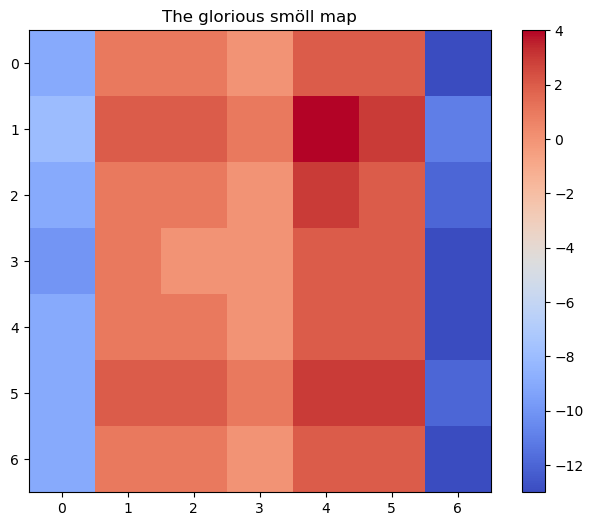

In [5]:
def plot_heatmap(square_map: np.ndarray, name = 'test') -> None:
    """Plot the squared environment as a heatmap."""
    # Find min-max values to set up temperature properly
    min_val = np.min(square_map)
    max_val = np.max(square_map)
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(square_map, cmap='coolwarm', vmin=min_val, vmax=max_val, interpolation='nearest')
    plt.title(f'The glorious {name} map')
    plt.colorbar()
    plt.show()
# Test
plot_heatmap(small_map, name=small_map_name)

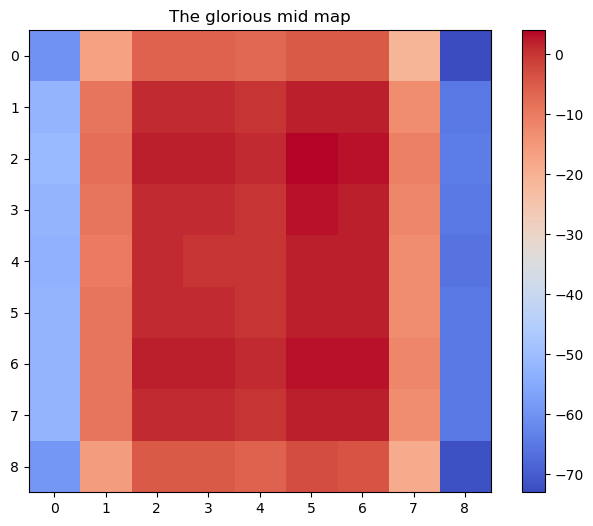

In [6]:
map_81_name = 'mid'
map_81 = get_square_map(depth=4, name=map_81_name)
plot_heatmap(map_81, name=map_81_name)

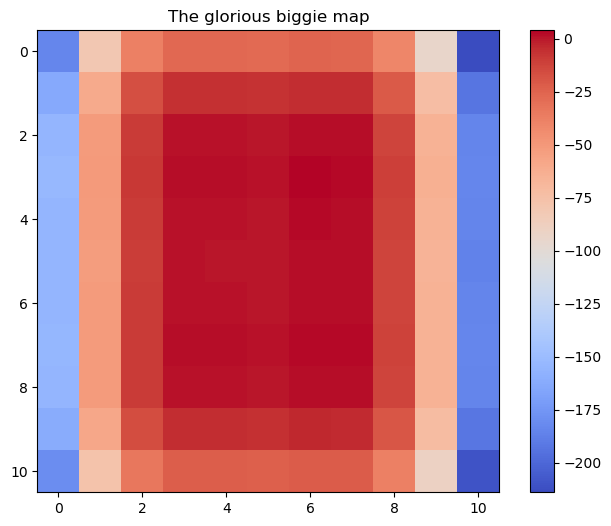

In [7]:
map_361_name = 'biggie'
map_361 = get_square_map(depth=5, name=map_361_name)
plot_heatmap(map_361, name=map_361_name)

In [8]:
print(f'Maximum: {make_api_call(2, 2)}')
print(f'Minimum: {make_api_call(-100, -100)}')

Maximum: 3
Minimum: -41115836


* The environment contains z-values spanning from negative infinity to positive infinity.
* The environment almost chaotically transitions between lows and highs:
    * global minimum at (2, 2)
    * global maximum at (100, 100)
* The single-step map revealed multiple local maximums and multiple local maximums
* Revealing 100x100 map is unnecessary

---

#### Far-step heatmap of the environment

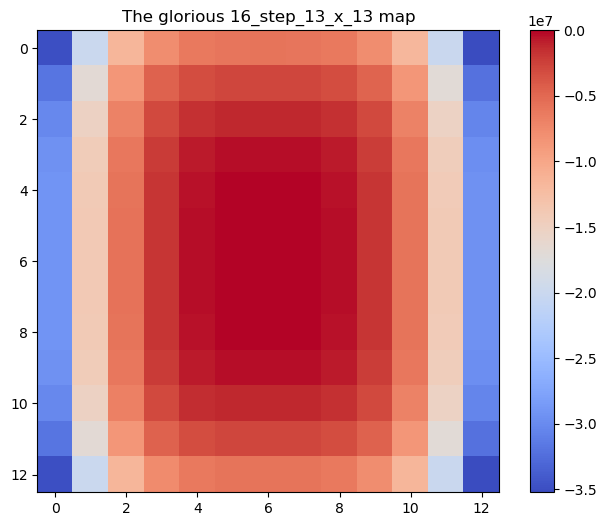

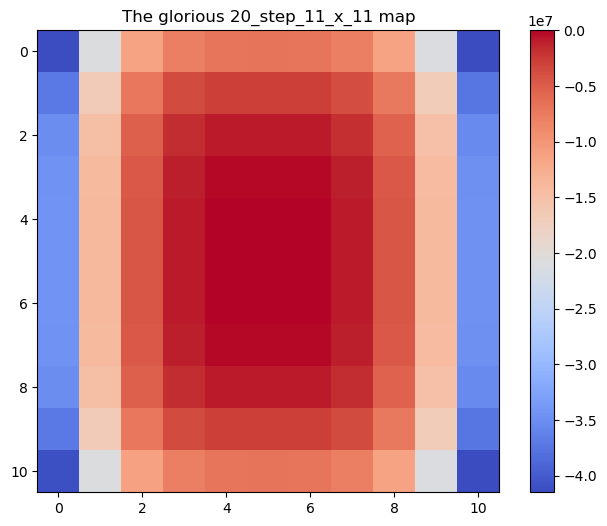

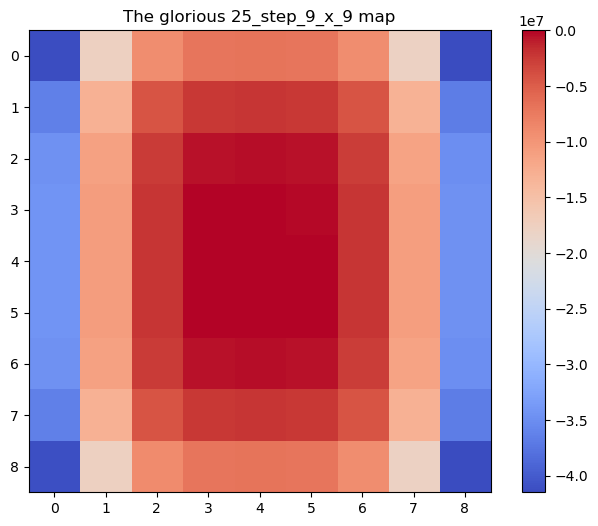

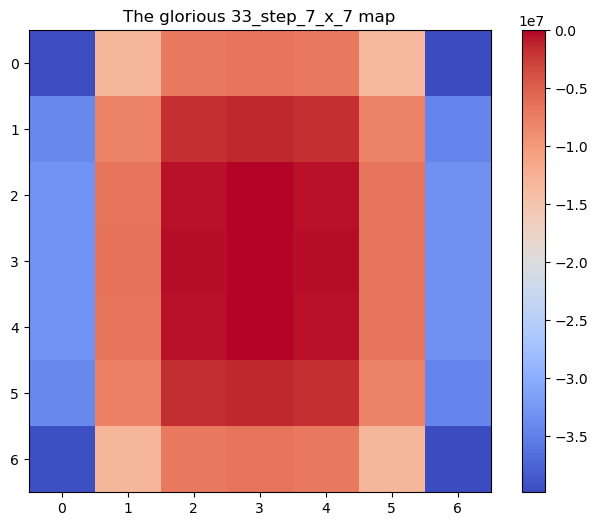

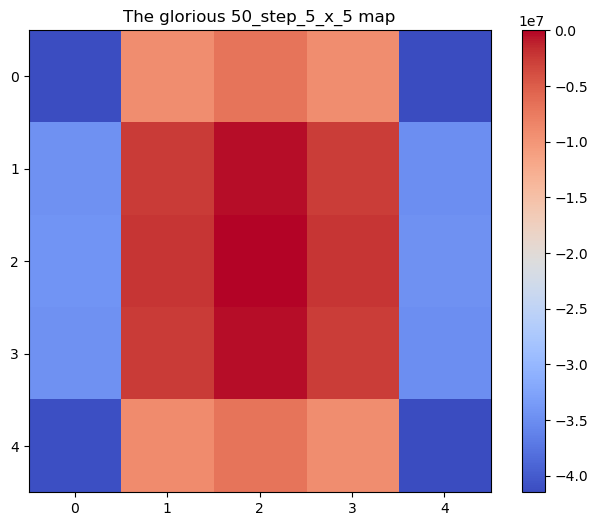

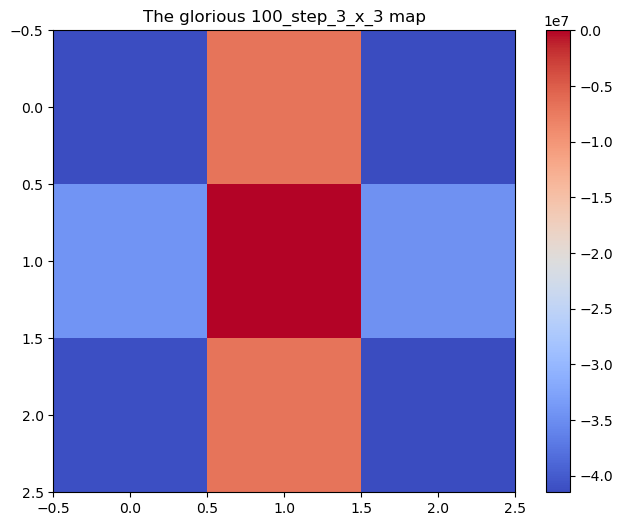

In [9]:
sizes = [
    (6, 16, '16_step_13_x_13'),
    (5, 20, '20_step_11_x_11'),
    (4, 25, '25_step_9_x_9'),
    (3, 33, '33_step_7_x_7'),
    (2, 50, '50_step_5_x_5'),
    (1, 100, '100_step_3_x_3'),
]
for depth, step, name in sizes:
    square_map = get_square_map(depth=depth, step=step, name=name)
    plot_heatmap(square_map, name=name)

* 100x100 maps approximately show where the function origin is.
* Maybe 

---

#### Conclusions

1. The map is built using a linear function.
2. The linear function goes through zero-coordinates.
3. The best solution is at the edge of the map.
4. The linear regression should be the most optimal solution to learn the pattern.